# Time Series Analytics: Part 2 - Decomposition

---
### Contents:

1. Problem Statement


2. Imports


3. Load Dataset


---

# 1. Background

# 2. Imports

In [2]:
library(stats)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(corrplot)
library(broom)
library(ggpubr)
library(MASS)
library(writexl)
library(readxl)
library(ggplot2)
library(ggspectra)
library(ggrepel)
library(forecast)
library(fpp3)
library(lubridate)

# 3. Loading Dataset

In [3]:
# CSV
# df = read.csv("data/Preprocessed_Dataset.csv", sep = ",")
# EXCEL
df = read_excel("data/Preprocessed_Dataset.xlsx")
df$Date <- as.Date(df$Date, format = "%Y-%m-%d")
str(df)

tibble [6,435 × 16] (S3: tbl_df/tbl/data.frame)
 $ Store       : num [1:6435] 1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : Date[1:6435], format: "2010-02-05" "2010-02-12" ...
 $ Temperature : num [1:6435] 42.3 38.5 39.9 46.6 46.5 ...
 $ Fuel_Price  : num [1:6435] 2.57 2.55 2.51 2.56 2.62 ...
 $ MarkDown1   : num [1:6435] NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown2   : num [1:6435] NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown3   : num [1:6435] NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown4   : num [1:6435] NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown5   : num [1:6435] NA NA NA NA NA NA NA NA NA NA ...
 $ CPI         : num [1:6435] 211 211 211 211 211 ...
 $ Unemployment: num [1:6435] 8.11 8.11 8.11 8.11 8.11 ...
 $ IsHoliday   : logi [1:6435] FALSE TRUE FALSE FALSE FALSE FALSE ...
 $ Weekly_Sales: num [1:6435] 1643691 1641957 1611968 1409728 1554807 ...
 $ Type        : chr [1:6435] "A" "A" "A" "A" ...
 $ Size        : num [1:6435] 151315 151315 151315 151315 151315 ...
 $ Holiday_Flag

In [4]:
dim(df)

[1] 6435   16

In [5]:
df_20 <- df[df$Store == '20', ]
rownames(df_20) <- NULL
df_20

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Type,Size,Holiday_Flag
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>
20,2010-02-05,25.92,2.784,NA,NA,NA,NA,NA,204.2472,8.187,FALSE,2401395,A,203742,0
20,2010-02-12,22.12,2.773,NA,NA,NA,NA,NA,204.3857,8.187,TRUE,2109108,A,203742,1
20,2010-02-19,25.43,2.745,NA,NA,NA,NA,NA,204.4321,8.187,FALSE,2161550,A,203742,0
20,2010-02-26,32.32,2.754,NA,NA,NA,NA,NA,204.4631,8.187,FALSE,1898194,A,203742,0
20,2010-03-05,31.75,2.777,NA,NA,NA,NA,NA,204.4941,8.187,FALSE,2119214,A,203742,0
20,2010-03-12,43.82,2.818,NA,NA,NA,NA,NA,204.5251,8.187,FALSE,2010975,A,203742,0
20,2010-03-19,47.32,2.844,NA,NA,NA,NA,NA,204.3782,8.187,FALSE,1951848,A,203742,0
20,2010-03-26,50.49,2.854,NA,NA,NA,NA,NA,204.2018,8.187,FALSE,1894743,A,203742,0
20,2010-04-02,51.00,2.850,NA,NA,NA,NA,NA,204.0253,7.856,FALSE,2405395,A,203742,0


# 4. Time Series Decomposition

Time series data can exhibit a variety of patterns, and it is often helpful to split a time series into several components, each representing an underlying pattern category.

- 4.1. Classical decomposition
- 4.2. X11 decomposition
- 4.3. SEATS decomposition
- 4.4. Seasonal and Trend decomposition using Loess
- 4.5. Forecasting with decomposition

In [289]:
org_data = data.frame(Store=df$Store, 
                      Date=df$Date, 
                      Temperature=df$Temperature, 
                      CPI=df$CPI,
                      Weekly_Sales=df$Weekly_Sales)
head(org_data, 5)

# Average Sales per week across all store locations:
avg_data = org_data %>%
            group_by(Date) %>%
            summarise(Sales = sum(Weekly_Sales)) %>%
            ungroup()
head(avg_data, 5)

# Convert data into time series, across all store locations:
df_ts = avg_data %>%
        mutate(Date = yearweek(Date)) %>%
        as_tsibble(index = Date)
head(df_ts, 5)

,Store,Date,Temperature,CPI,Weekly_Sales
,<dbl>,<date>,<dbl>,<dbl>,<dbl>
1,1,2010-02-05,42.31,211.0964,1643691
2,1,2010-02-12,38.51,211.2422,1641957
3,1,2010-02-19,39.93,211.2891,1611968
4,1,2010-02-26,46.63,211.3196,1409728
5,1,2010-03-05,46.50,211.3501,1554807


Date,Sales
<date>,<dbl>
2010-02-05,49750740
2010-02-12,48336678
2010-02-19,48276994
2010-02-26,43968571
2010-03-05,46871470


Date,Sales
<week>,<dbl>
2010 W05,49750740
2010 W06,48336678
2010 W07,48276994
2010 W08,43968571
2010 W09,46871470


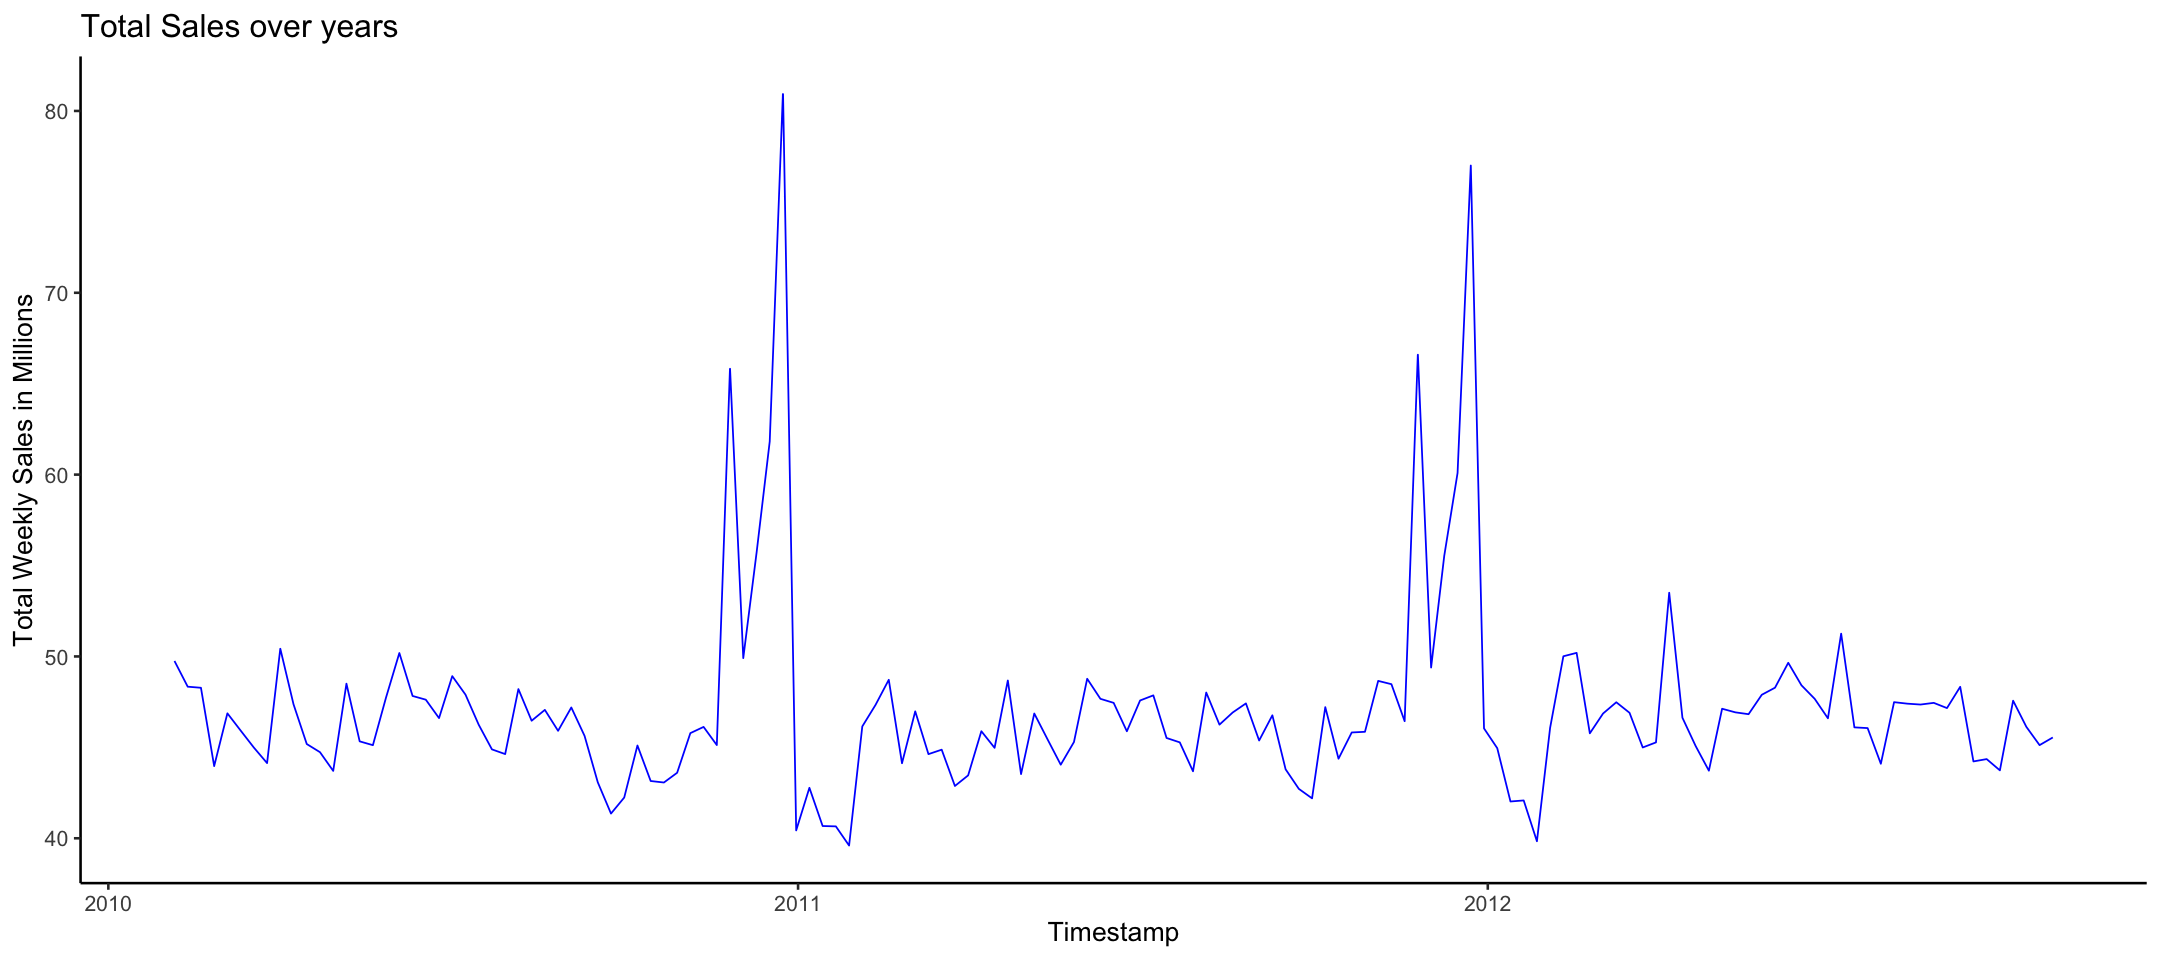

In [290]:
# Plot for total sales through time:

options(repr.plot.width=18, repr.plot.height=8)
avg_data %>%
    ggplot(aes(Date, Sales/1000000, group = 1)) +
    geom_line(colour='blue', alpha=1) +
    theme_classic(base_size = 16) +
    xlab("Timestamp") +
    ylab("Total Weekly Sales in Millions") + 
    ggtitle("Total Sales over years")

- Trend appears to be linear and stationary.


- Seasonality appears to be non-linear owing to holiday seasonal jumps around the end of each year, which is an expected behaivour.


- Pattern appears to be constant and repetitive with each year experiencing a seasonal jump during the end of the year, but no evident cyclic pattern can be observed here.

## 4.1. Classical decomposition

The classical decomposition method originated in the 1920s. It is a relatively simple procedure, and forms the starting point for most other methods of time series decomposition. There are two forms of classical decomposition: an additive decomposition and a multiplicative decomposition.  In classical decomposition, we assume that the seasonal component is constant from year to year.

In [291]:
# prepare time series data with weekly frequency:

df_ts_weekly = ts(avg_data$Sales, 
               freq=365.25/7, 
               start=decimal_date(ymd("2010-02-05")))

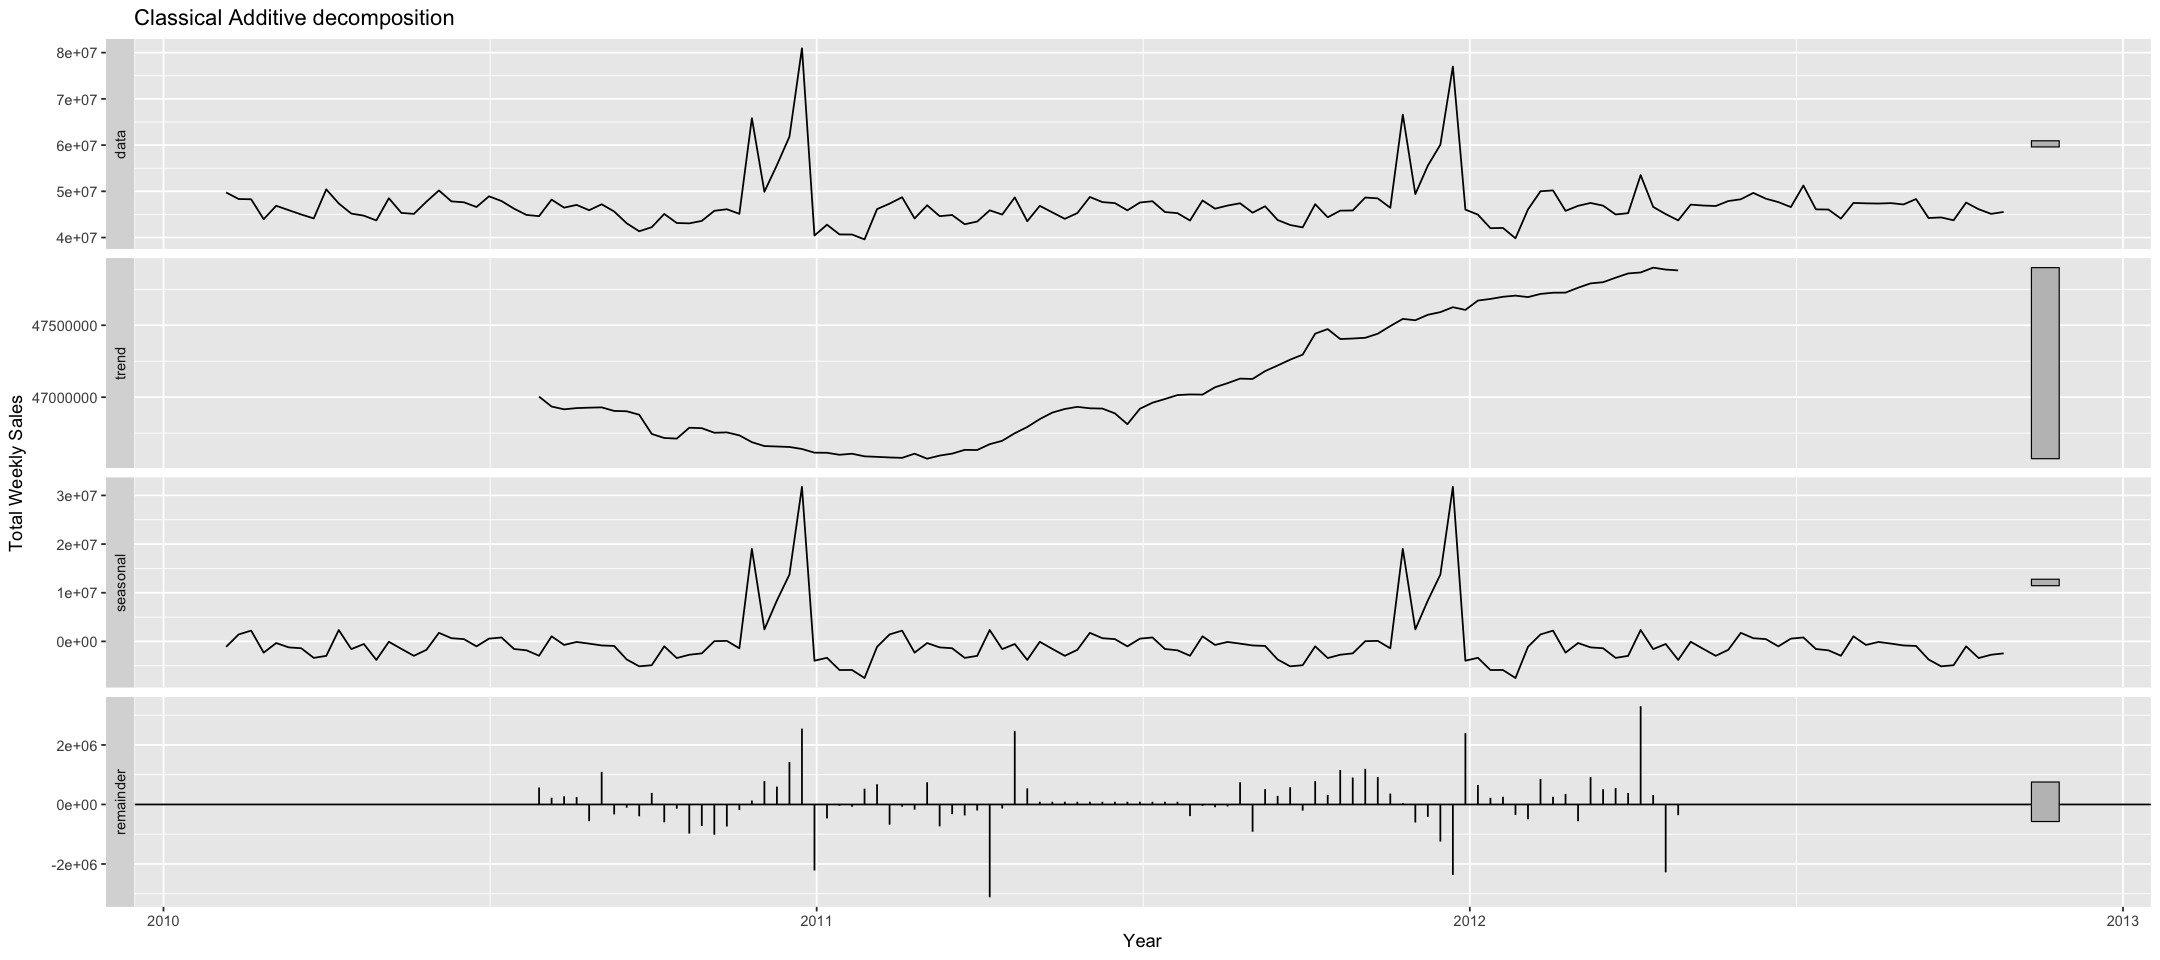

In [292]:
# Perform additive decomposition
additive_decomp <- decompose(df_ts_weekly, type = "additive")

# Perform multiplicative decomposition
multiplicative_decomp <- decompose(df_ts_weekly, type = "multiplicative")

# Plot the original time series, trend, seasonal, and random components for additive decomposition
autoplot(additive_decomp) + 
    ylab("Total Weekly Sales") +
    xlab("Year") +
    ggtitle("Classical Additive decomposition")

# Plot the original time series, trend, seasonal, and random components for multiplicative decomposition
# autoplot(multiplicative_decomp) + 
#     ylab("Total Weekly Sales") +
#     xlab("Year") +
#     ggtitle("Classical multiplicative decomposition")

While classical decomposition is still widely used, it is not recommended, as there are now several much better methods. Some of the problems with classical decomposition are summarised below.

- Classical decomposition methods assume that the seasonal component repeats from year to year. For many series, this is a reasonable assumption, but for some longer series it is not. The classical decomposition methods are unable to capture these seasonal changes over time.

## 4.2. X11 decomposition

This method is based on classical decomposition, but includes many extra steps and features in order to overcome the drawbacks of classical decomposition that were discussed in the previous section. In particular, trend-cycle estimates are available for all observations including the end points, and the seasonal component is allowed to vary slowly over time. 

## 4.3. Seasonal Extraction in ARIMA Time Series decomposition (SEATS)

This procedure was developed at the Bank of Spain, and is now widely used by government agencies around the world. The procedure works only with quarterly and monthly data. So seasonality of other kinds, such as daily data, or hourly data, or weekly data, require an alternative approach.

In [300]:
library(seasonal)

In [301]:
df_ts_weekly %>% 
    seas() %>%
    autoplot() +
      ggtitle("SEATS decomposition of electrical equipment index")

ERROR: Error: X-13 run failed

Errors:
- Seasonal period too large. See Section 2.7 of the Reference
  Manual on program limits
- Expected argument name or "}" but found ".1785714285714"
- Time series could not be read due to previously found errors
- Expected specification name but found "}"
- Specify series before user-defined adjustments
- Need to specify a series to identify outliers

Notes:
- Correct input errors in the order they are detected since the
  first one or two may be responsible for the others (especially
  if there are errors in the SERIES or COMPOSITE spec).


## 4.4. Seasonal and Trend decomposition using Loess decomposition (STL)

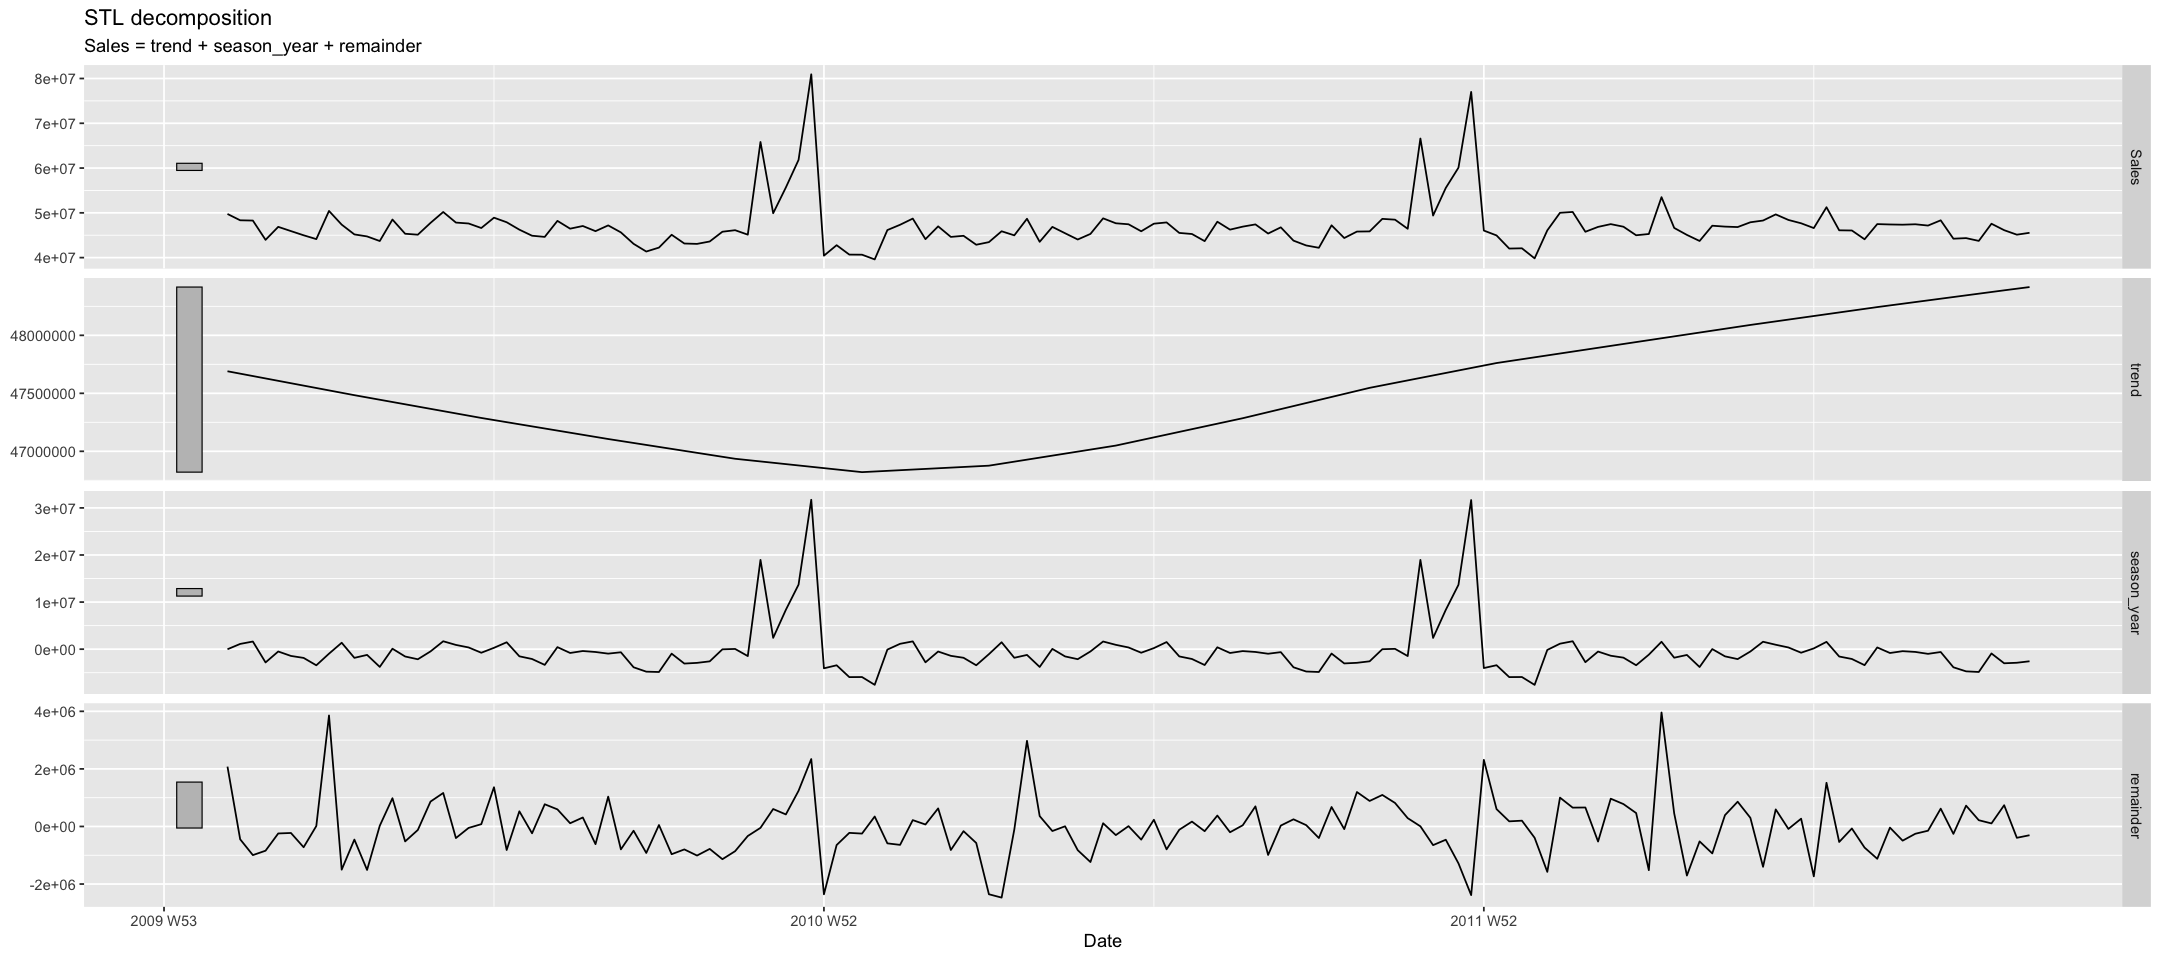

In [293]:
df_ts %>%
    model(STL(Sales)) %>% 
    components() %>% 
    autoplot()

## 4.5. Forecasting using decomposition

---
---

## 1. Violation of Linearity Assumption

Diagnosis:

- Fitted vs Observed Plot
- Residuals vs Fitted Plot

In [ ]:
## Predicted/Fitted vs Observed Plot

options(repr.plot.width=10, repr.plot.height=6)
ggplot(df.diagnostics, aes(x=y, y=yhat)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(se=F, col="#CFB87C") + 
    geom_abline(intercept=0, slope=1) +
    xlab("Y: Observed Values") + 
    ylab("Y_hat: Fitted/Predicted Values")

- The observed vs the predicted value plot should follow the black like (above) y=x
 with only random deviations.


- Rather, the plot shows some curvature, as captured by the gold curve. This curvature shows that, for high values of the response, say above 22 the model is under-predicting (because the fitted values are lower than the observed values). For middle values of the response, we have a slight over prediction and for low values we have under-prediction but with some more variability.


- All of the suggests, that some linearity is violated.

In [ ]:
## Residuals vs Fitted Plot

ggplot(df.diagnostics, aes(x=yhat, y=r)) +
  geom_point(alpha = 0.5) + 
  geom_smooth(se=F, col = 'black') + 
  xlab("Predicted/Fitted Values") + 
  ylab("Residuals") + 
  theme_bw()

- Here, we can deduce from our plot, that there is some curvature in the data which is not being captured by our model.


- Linearity assumption seems a bit violated.

.


***Linearity assumption is violated!***

.

## 2. Violation of Independence Assumption

Note that the data doesn’t provide us with any natural ordering, e.g., time or distance measurements. So, we need to sort the values based on any one of the features, and then use index.

Diagnosis:

- Residual vs Ordered Index plot
- Successive Residuals plot
- Durbin-Watson Hypothesis Testing

In [ ]:
## Residual vs Ordered Index plot

ggplot(df.diagnostics, aes(df.diagnostics$Date, y=r)) + 
  geom_point(alpha = 0.5) + 
  geom_abline(slope = 0, intercept = 0) +
  geom_smooth(se = F, col = 'black') +
  xlab("Ordered Index") +
  ylab("Residuals") + 
  theme_bw()

- If the independence assumptions is satisfied, the residuals will be randomly scattered around the zero, there should not be any correlation between successive errors under the ordering.


- But there appears to be some structure and violation!


The structure may be due to the non-linearity of the data, but there there’s also a higher correlation between successive residuals, when ordering with respect to ‘youtube’.

In [ ]:
## Successive residuals plot

# size
n = dim(df)[1]; 

# Succfessive Error terms (residuals)
e1 = head(df.diagnostics$r, n-1)
e2 = tail(df.diagnostics$r, n-1)
cat("Correlation between two successive error terms: ", cor(e1, e2))

srp = data.frame(e1, e2)
ggplot(srp, aes(x = e1, y = e2)) + 
    geom_point() + 
    geom_vline(xintercept = 0) + 
    geom_hline(yintercept = 0) + 
    xlab(expression(hat(epsilon)[i])) +
    ylab(expression(hat(epsilon)[i+1])) + 
    ggtitle("Successive Residuals Plot") + 
    theme_bw() + 
    theme(plot.title = element_text(hjust = 0.5)) 

- For this particular case, there seems no auto-correlation. But this could be misleading, sincfe other error terms could be correlated.


- We may examine multiple consecutive residual terms and then justify.


- Therefore, $Corr(Y_i,Y_j)=Corr(ϵ_i,ϵ_j)=0$ where i≠j

.


***Independence assumption is violated based on first plot!***

.

## 3. Violation of Homoscedasticity Assumption (constant variance)

Non constant variance assumption test.


Diagnosis:

- Residuals vs Fitted/Predicted Plot
- Breusch-Pagan Test

In [ ]:
## Residuals vs Fitted Plot

ggplot(df.diagnostics, aes(x=yhat, y=r)) +
  geom_point(alpha = 0.5) + 
  geom_smooth(se=F, col = 'black') + 
  xlab("Predicted/Fitted Values") + 
  ylab("Residuals") + 
  theme_bw()

- If the variance of the errors were in-fact constant, the data points would be randomly dispersed around zero without any noticeable exploding pattern.


- Here, although we can see a dipping curvature, it still follows a constant variance along with that dip! There is no trumphet pattern or any other significant pattern to reveal constanct variance violation or breach ***heteroscedasticity.***


- Homoscedasticity is maintained.

In [ ]:
## Breusch-Pagan Test

# install.packages("lmtest")
library(lmtest)

# perform Breusch-Pagan test
bptest(lmod)

The Breusch-Pagan test uses the following null and alternative hypotheses:

- $H_o$ : Homoscedasticity is present (the residuals are distributed with constant variance)
- $H_a$ : Homoscedasticity is absent, i.e. Heteroscedasticity is present



As per the Breusch-Pagan Test, the p-value is 0.1623, which is greater than $\alpha$ level of significance.  Thus we fail to reject the Null Hypothesis, and thus Homoscedasticity is present!


.


***Constant Variance assumption is NOT violated!***

.

## 4. Violation of Normality Assumption

Whether error term follows a normal distribution or not?


Diagnosis:
- QQ Plot - Residual Quantiles vs Theoretical Normal Distribution Quantiles Plot

- Residuals vs Fitted Plot

- Shapiro-Wilk Test

In [ ]:
# QQ: Quantile Residuals - Quantiles True Normal Plot

ggplot(df.diagnostics, aes(sample = (r - mean(r))/sd(r) )) +
  stat_qq() + 
  geom_abline(slope = 1, intercept = 0, col="#CFB87C") +
  xlab("Theoretical Quantiles for True Normal Distribtuion") + 
  ylab("Residual Quantiles") + 
  ggtitle("Q-Q plot for Residuals")

- The usual QQ plot for no violations model (normal and constant variance) would align the QQ plot along the diagonal of the curve.


- There is some deviation from normality especially in the head and the tails of the distributions. The non-normality that we observe is like due to the (1) the outlier, (2) the violation of the linearity assumptions.


- Though the majority of the data points follow the diagonal line, which indicates that the normality assumption was met.


- Mathematically, $ϵ∼N(0, constant−variance)$

In [ ]:
## Residuals vs Fitted Plot

ggplot(df.diagnostics, aes(x=yhat, y=r)) +
  geom_point(alpha = 0.5) + 
  geom_smooth(se=F, col = 'black') + 
  xlab("Predicted/Fitted Values") + 
  ylab("Residuals") + 
  theme_bw()

- Nothing is much clear from this plot.

### Shapiro Wilk Test


The Shapiro-Wilk’s test or Shapiro test is a normality test in frequentist statistics. The null hypothesis of Shapiro’s test is that the population is distributed normally. If the value of p is equal to or less than 0.05, then the hypothesis of normality will be rejected by the Shapiro test. On failing, the test can state that the data will not fit the distribution normally with 95% confidence. However, on passing, the test can state that there exists no significant departure from normality. This test can be done very easily in R programming.


$W=\frac{(\sum_{i=1}^n a_ix_{(i)})^2}{(\sum_{i=1}^n x_i - \bar{x})^2}$

where,

- x(i) : it is the ith smallest number in the given sample.
- mean(x) : ( x1+x2+……+xn) / n i.e the sample mean.
- ai : coefficient that can be calculated as (a1,a2,….,an) = (mT V-1)/C . 

Here V is the covariance matrix, m and C are the vector norms that can be calculated as C= || V-1 m || and m = (m1, m2,……, mn ).


###### Hypothesis:

$H_o:$ Samples residuals came from a normal distribution.

$H_a:$ Samples residuals did not came from a normal distribution.

In [ ]:
# Shapiro test of Normality

# loading the package
library("dplyr")

# Using the shapiro.test() to check
shapiro.test(df$Weekly_Sales)

- For all three features, the p-value is small and less than the alpha, thus we reject the Null hypothesis which stated these samples came from a normal distribution. 


- Thus, the hypothesis of normality is rejected by the Shapiro test.


.

***Normality assumption is violated!***

.

----
----